# Social Network Analysis - Exercise Sheet 4


### 4a) Roles in graphs.

In this exercise, we will determine roles in graphs based on (equivalence) relations. More specifically, you will implement methods which decide whether some relation is fullfilled. Based on these and some generic equivalence relations that a user can specify, you will compute partitions of graphs as well as maximal roles.

#### Guidelines
* Submit your code zipped via [moodle](https://moodle.uni-kassel.de/course/view.php?id=18460) until 13.07.2025 23:55 MEZ
* Use the [NetworkX](https://networkx.github.io/documentation/stable/) library for your graphs.

##### Exercise 1:
1. Implement a function which decides whether two nodes of a graph are structurally equivalent.
2. Implement a function which for some relation decides whether it is an equivalence relation.
3. Implement a function which takes as its parameters some input equivalence decision function and a graph. The function then computes a partition of the graph based on the equivalence relation.
4. Implement a function which decides whether two a relation is a structural graph equivalence relation.
5. Implement a function which, for some input graph and structural graph equivalence, or its characteristic function, computes maximal roles.
6. Provide an example (real world) network and a structural graph equivalence relation. Compute all maximal roles. What insights do you get?

In [1]:
import networkx as nx

def structurally_equivalent(G, node_i, node_j):
    
    return set(G.neighbors(node_i)) - {node_i} == set(G.neighbors(node_j)) - {node_j}

def is_equivalence_relation(G, relation):
    
    nodes = list(G.nodes())
    
    #reflexivity
    for node in nodes:
        
        if not relation(G, node, node):
            return False

    #symmetry
    for i in range(len(nodes)):
        for j in range(len(nodes)):
            
            if relation(G, nodes[i], nodes[j]) != relation(G, nodes[j], nodes[i]):
                return False

    #tansitivity
    for i in range(len(nodes)):
        for j in range(len(nodes)):
            for k in range(len(nodes)):
                
                if relation(G, nodes[i], nodes[j]) and relation(G, nodes[j], nodes[k]):
                    if not relation(G, nodes[i], nodes[k]):
                        return False
                        
    return True

def equivalence_classes(G, relation):
    
    nodes = set(G.nodes())
    classes = []
    visited = set()

    for u in nodes:
        
        if u in visited:
            continue
            
        eq_class = {u}
        
        for v in nodes:
            if v != u and relation(G, u, v):
                eq_class.add(v)
                
        visited.update(eq_class)
        classes.append(eq_class)

    return classes

def is_structural_equivalence(G, relation):

    nodes = set(G.nodes())
    
    if not is_equivalence_relation(G, relation):
        return False

    for u in nodes:
        for v in nodes:

            if relation(G, u, v) and not set(G.neighbors(u)) - {u} == set(G.neighbors(v)) - {v}:
                return False
        
    return True
    
def maximal_roles(G, relation):
    
    classes = equivalence_classes(G, relation)
    role_assignment = {}
    
    for role_id, eq_class in enumerate(classes, start=1):
        for node in eq_class:
            role_assignment[node] = role_id

    return role_assignment


G = nx.karate_club_graph()
maximal_roles(G, structurally_equivalent)

{0: 1,
 1: 2,
 2: 3,
 3: 4,
 4: 5,
 5: 6,
 6: 7,
 7: 8,
 8: 9,
 9: 10,
 10: 11,
 11: 12,
 12: 13,
 13: 14,
 14: 15,
 15: 15,
 18: 15,
 20: 15,
 22: 15,
 16: 16,
 17: 17,
 21: 17,
 19: 18,
 23: 19,
 24: 20,
 25: 21,
 26: 22,
 27: 23,
 28: 24,
 29: 25,
 30: 26,
 31: 27,
 32: 28,
 33: 29}

### Insights

The role assignment shows that most members of the Karate Club occupy unique structural positions, reflecting diverse patterns of interaction. However, a few members—like nodes 15, 18, 20, and 22—share identical neighbor sets, they likely represent peripheral members who are connected to the same central figures, suggesting interchangeable social positions.

### 4b) Roles and Cohesion.

This exercise is dedicated towards roles and cohesion in networks. By completing this exercise sheet, you gain insights to the _"weaker"_ notions for community detection. For this, you investigate k-cores and modularity.  


#### Guidelines
* Use the [NetworkX](https://networkx.github.io/documentation/stable/) library for your graphs.

##### Exercise 1:
* Write a function that computes the k-core of a graph.  
* What complexity does your algorithm have? Compare it to complexities related to cliques.
* Write a function that given a graph G computes the size of all non-empty k-cores of G and plots the core number k against the size of that core.

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

def k_core(G, k):
    
    return nx.k_core(G, k=k).nodes

def all_k_cores(G):
    
    data = []
    
    for k in range(max(dict(G.degree()).values())):
        core_size = len(k_core(G, k))
        if core_size > 0:
            data.append((k, core_size))

    x, y = zip(*data)

    # Scatter plot
    plt.scatter(x, y)
    plt.xlabel('K - core')
    plt.ylabel('Size')
    plt.title('Core number k against the size of that core')
    plt.show()

### Complexity Comparison: K-Core vs Clique

**K-Core Decomposition**
- A k-core is a subgraph where all nodes have degree at least k.
- It can be computed efficiently in linear time: O(n + m), where n is the number of nodes and m is the number of edges.
- The algorithm removes nodes with degree less than k until no such nodes remain.

**Clique Finding**
- A clique is a set of nodes where every pair is connected.
- Finding the largest clique is an NP-hard problem.
- Listing all cliques can take exponential time in the worst case.
- These problems are much harder than computing k-cores.


##### Exercise 2:
* Write a function that computes the modulatity of a clustering in a Graph
* What is a simple way to use maximal cliques to generate a clustering of high modularity? Implement your algorithm.

In [3]:
from networkx.algorithms.community import modularity

def compute_modularity(G, clustering):
    
    return modularity(G, clustering)

def generate_high_modularity_clustering(G):
    
    cliques = list(nx.find_cliques(G))  # All maximal cliques
    cliques.sort(key=len, reverse=True)  # Prioritize larger cliques

    assigned = set()
    clusters = []

    for clique in cliques:
        cluster = set(clique) - assigned
        if cluster:
            clusters.append(cluster)
            assigned.update(cluster)

    # Assign any leftover unassigned nodes to singleton clusters
    for node in G.nodes():
        if node not in assigned:
            clusters.append({node})

    return clusters

### Clustering of high modularity

This algorithm generates a clustering by greedily selecting large maximal cliques, assigning each node to the first clique it appears in. Since cliques are highly connected subgraphs, this results in clusters that are internally dense—matching the goal of maximizing modularity. Any leftover nodes are placed in their own singleton clusters to ensure full coverage.

#####  Small Case Study
* Research for a small network data set with 20-50 nodes, provide its source and describe the network.
* Use your function to compute all its non-empty core sizes and plot them.
* Which k-cores do you find the most interesting based on the k-core size distribution? 
* What insights did you gain from the k-core?
* Use your partition method to compute a clustering of the network and its modularity. What can you learn based on your results? 
* Compute a maximum clique and a maximal threshold graph of your network. Compare them to the k-core and clustering of your network.

### Karate Club

https://networkx.org/documentation/stable/auto_examples/graph/plot_karate_club.html

The Karate Club graph is a social network of 34 members that captures friendships within a karate club, famously splitting into two communities around a conflict between the club’s instructor and administrator.

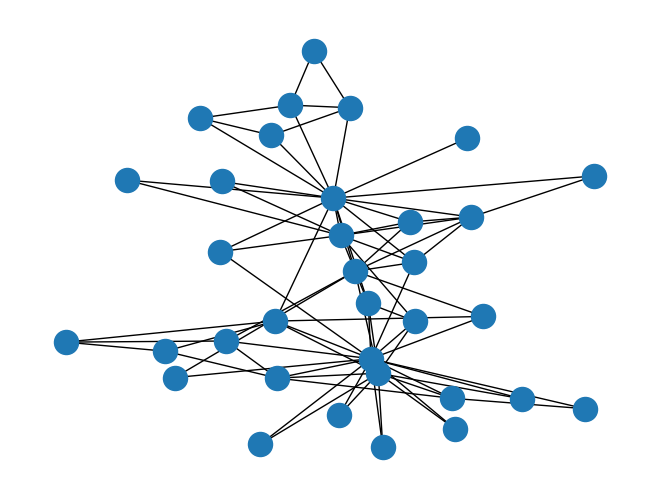

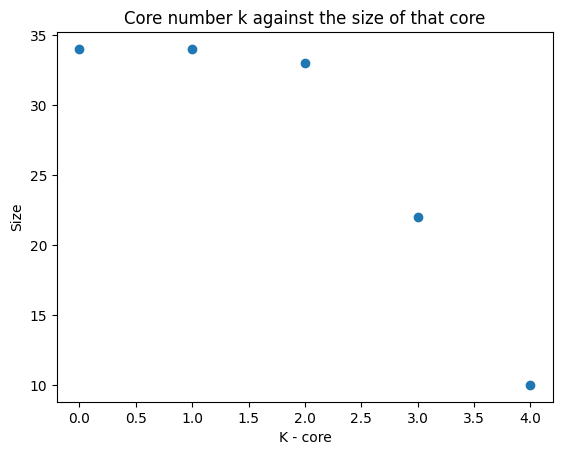

 Clustering: [{0, 1, 2, 3, 13}, {7}, {32, 33, 8, 30}, {29, 23}, {17}, {19}, {21}, {10, 4}, {6}, {5}, {12}, {16}, {14}, {15}, {18}, {20}, {22}, {31}, {26}, {27}, {28}, {24, 25}, {11}, {9}]
 Modularity: 0.12311425947789585
 Clique: {0, 1, 2, 3, 7}


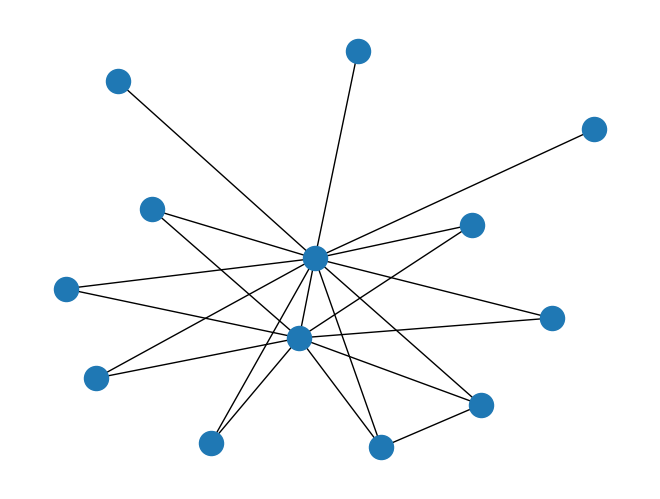

In [4]:
from networkx.algorithms.threshold import find_threshold_graph

G = nx.karate_club_graph()

nx.draw(G)
plt.show()

all_k_cores(G)

cluster = generate_high_modularity_clustering(G)
print(f" Clustering: {cluster}")
print(f" Modularity: {compute_modularity(G, cluster)}")

print(f" Clique: {nx.approximation.max_clique(G)}")
T = find_threshold_graph(G)

nx.draw(T)
plt.show()


### Insights

**K-core**

The most interesting insight from the k-core analysis is that only a small core of tightly connected nodes remains at higher k-values (k=3 and k=4), revealing the most central and influential members of the network. This suggests a strong core-periphery structure, where a few nodes hold the network together. It highlights how the network fragments under increasing connectivity requirements.

**Cluster**

The low modularity score (~0.084) indicates that the clustering based on maximal cliques fails to capture strong community structure in the network. Most clusters are small or isolated, resulting in few internal connections and many edges crossing between groups. This suggests that the clique-based method oversimplifies the network’s true social divisions.

**Threshold graph**

The maximum clique in the network identifies a small, fully connected group (e.g., 5–6 nodes), highlighting the most tightly-knit subset of the graph. In contrast, the threshold graph simplifies the network into a structure built from sequential additions of universal or isolated nodes, which strips away much of the original connectivity detail. Compared to the k-core, which reveals layered, resilient subgroups, and the clustering, which loosely captures community boundaries, the clique and threshold graph emphasize only the most extreme forms of cohesion and hierarchy, offering limited insight into broader community structure.